# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [202]:
"""
Bonus Exercises: https://github.com/Tomjohnsonellis/strive-work/tree/main/machine-learning/k-means/jons-bonus-exercises
"""

import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [203]:

iris_data = load_iris()


In [204]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    dataset = load_iris()
    df = pd.DataFrame(dataset.data.tolist(), columns=[feature.strip(" (cm)") for feature in dataset.feature_names])
    # For some reason numpy ndarrays can't use .replace() so I put the data into a series.
    target_series = pd.Series(dataset.target)
    class_series = target_series.replace({0: "setosa", 1:"versicolor",2:"virginica"})
    # Finally add these new series to the dataframe
    df["target"] = target_series
    df["class"] = class_series
    return df
    
df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
79,5.7,2.6,3.5,1.0,1,versicolor
142,5.8,2.7,5.1,1.9,2,virginica
98,5.1,2.5,3.0,1.1,1,versicolor
57,4.9,2.4,3.3,1.0,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
81,5.5,2.4,3.7,1.0,1,versicolor
38,4.4,3.0,1.3,0.2,0,setosa
59,5.2,2.7,3.9,1.4,1,versicolor
125,7.2,3.2,6.0,1.8,2,virginica
137,6.4,3.1,5.5,1.8,2,virginica


In [205]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [278]:
# Doing this the ugly way
col_1 = np.array(df_iris['sepal length'].values)
col_2 = np.array(df_iris['sepal width'].values)
col_3 = np.array(df_iris['petal length'].values)
col_4 = np.array(df_iris['petal width'].values)


#From our data we will only get variable columns as np.array
x = np.column_stack((col_1, col_2, col_3, col_4))

# Much prettier way of doing this!
#x = df_iris[["sepal length","sepal width","petal length","petal width"]].to_numpy


In [207]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [284]:
mergings = linkage(x, method="complete")

In [209]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

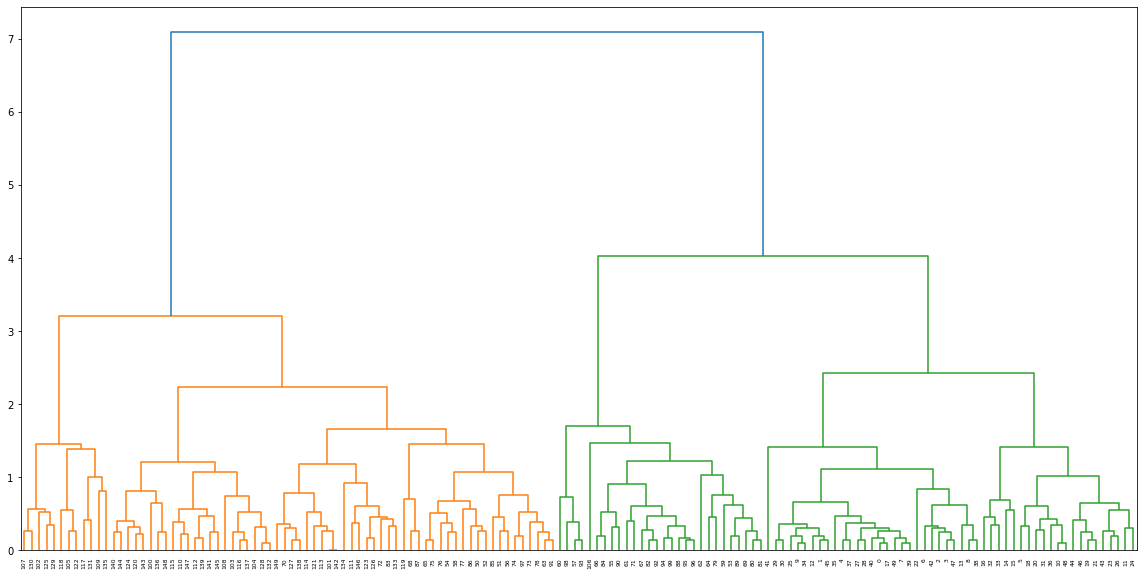

In [285]:
# # Unable to get labels=varieties, I'm assuming this means the flower type (setosa, versicolor, virginica)
# # But the list of those is one longer than mergings, pretty sure just removing one row would be incorrect
# varieties = df_iris["class"]
# print(varieties.shape)
# #dn = dendrogram(mergings, leaf_rotation=90, leaf_font_size=6, labels=varieties)

# No labels=varieties, Jon's orders
fig = plt.figure(figsize=(20, 10)) 
dn = dendrogram(mergings, leaf_rotation=90, leaf_font_size=6)

plt.show()

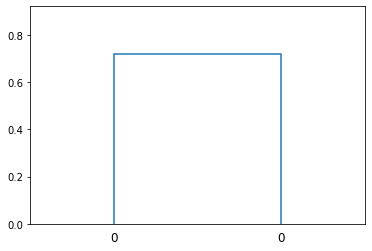

In [283]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [212]:
from sklearn.cluster import KMeans

df = pd.read_csv('./datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('./datasets/ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [213]:
model = KMeans(n_clusters=3)

In [214]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [215]:
model.fit(points)

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [216]:
labels = model.predict(points)

In [217]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [218]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2


def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []
    for i in range(len(labels)):
        if labels[i] == 0:
            data_0.append(points[i])
        if labels[i] == 1:
            data_1.append(points[i])
        if labels[i] == 2:
            data_2.append(points[i])
            
    data_0 = np.array(data_0)
    data_1 = np.array(data_1)
    data_2 = np.array(data_2)
    
    return data_0,data_1,data_2

#print(points)

data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(94, 2)
(95, 2)
(111, 2)


In [219]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

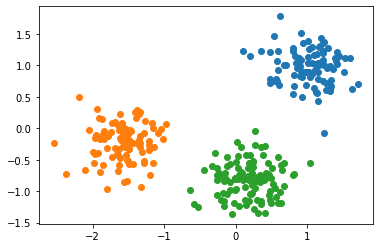

In [220]:
# plotting the data 

# I often forget this notation and wonder way [:][1] isn't working - memorise this! 
plt.scatter(data_0[:,0], data_0[:,1])
plt.scatter(data_1[:,0], data_1[:,1])
plt.scatter(data_2[:,0], data_2[:,1])


**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [221]:
# Neat! It can catorgorise things without being refitted!

new_labels = model.predict(new_points)

In [222]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [223]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []
new_0,new_1,new_2 =separate_labels(new_labels, new_points)




In [224]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

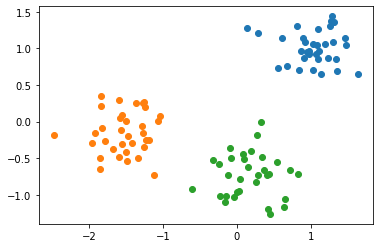

In [225]:
#plot the new labels

plt.scatter(new_0[:,0], new_0[:,1])
plt.scatter(new_1[:,0], new_1[:,1])
plt.scatter(new_2[:,0], new_2[:,1])

Text(0.5, 1.0, 'Pretty Clusters')

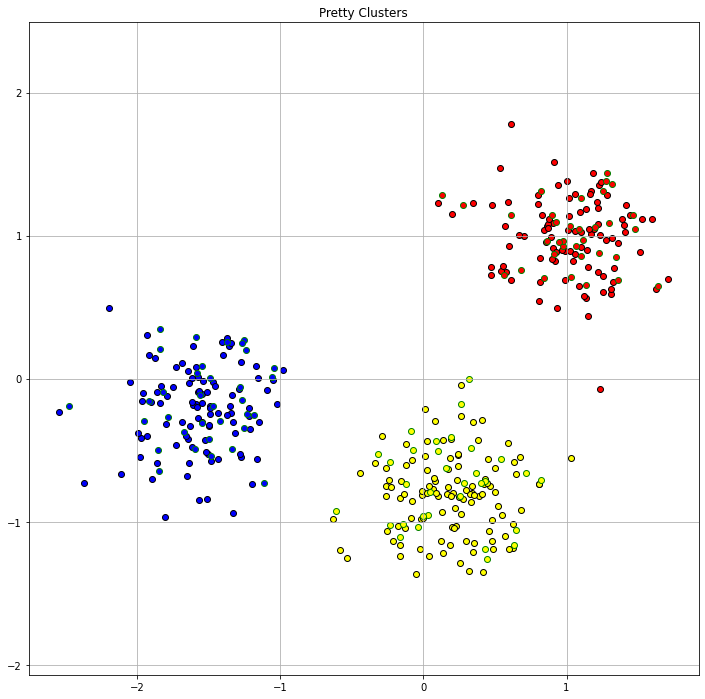

In [266]:
#plot all the points together
plt.figure(figsize=(12,12)) 

# Black bordered dots for the "training" data
plt.scatter(data_0[:,0], data_0[:,1], edgecolors="black", color="red")
plt.scatter(data_1[:,0], data_1[:,1], edgecolors="black", color="blue")
plt.scatter(data_2[:,0], data_2[:,1], edgecolors="black", color="yellow")
# Green bordered dots for the unseen/"test" data
plt.scatter(new_0[:,0], new_0[:,1], edgecolors="green", color="red")
plt.scatter(new_1[:,0], new_1[:,1], edgecolors="green", color="blue")
plt.scatter(new_2[:,0], new_2[:,1], edgecolors="green", color="yellow")

plt.axis('equal')
plt.grid()
plt.title("Pretty Clusters")